<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/DSP_lab2_2_filtering_noisy_signal_using_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

**Denoising using convolution**


In [3]:
#create signal
srate = 256 #Hz
t = np.arange(0,3,1/srate)
pnts = len(t)

print(pnts)
print(t)

768
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.

In [4]:
# creating a noiseless signal
x = np.sin(2*np.pi* 2 * t) #sinusoidal signal banabe

#creating a random noise
noise = 5 * np.random.randn(pnts)  #creating Gaussian noise with standard deviation 5.

#noisy signal sinusoidal + others kichu thakte pare

#Adding noise on signal
Noisysignal = x + noise #noise r signal er length same tai add kora hoyeche// or noise induced

#linear noise remove kora easy by convolution(denoise)

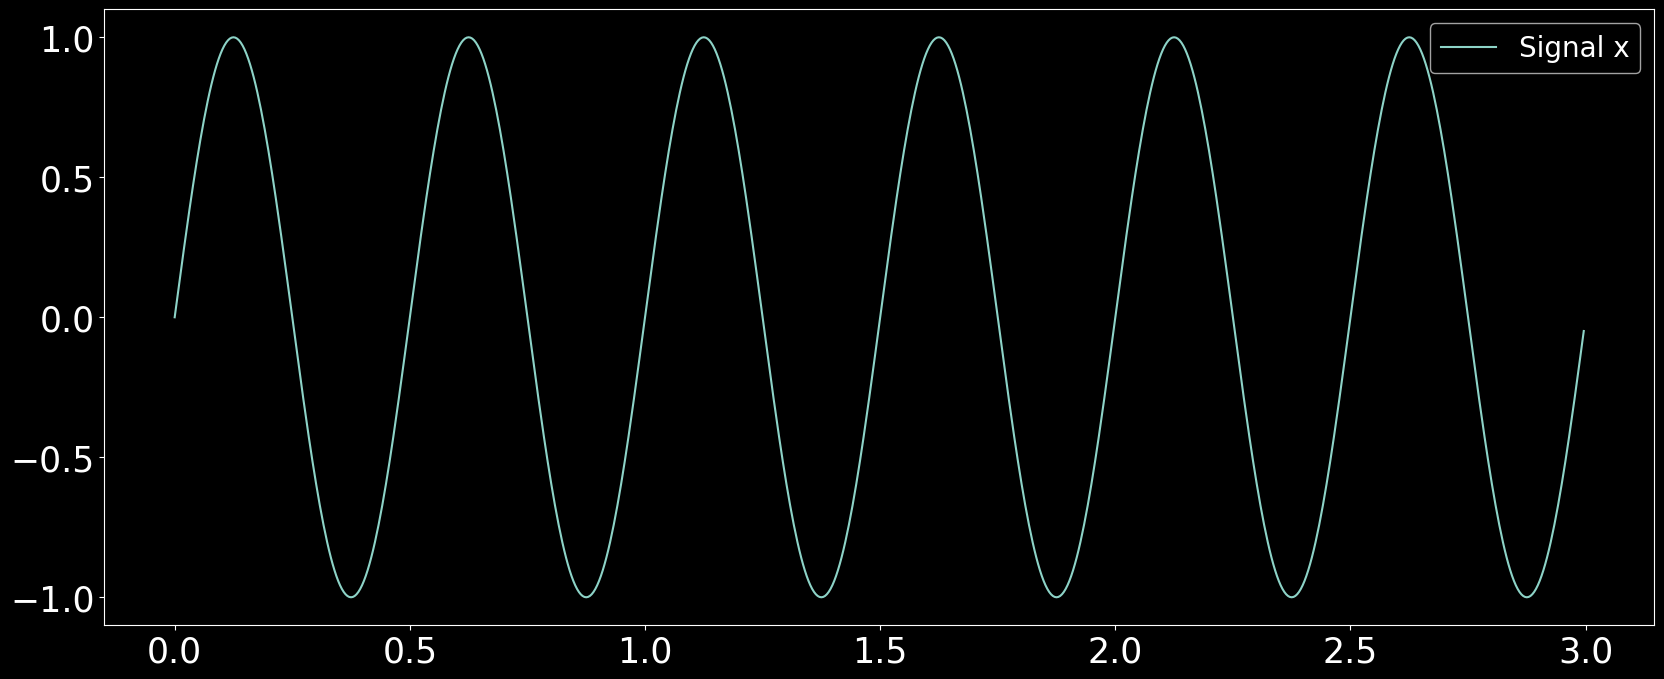

In [9]:
#Plotting original signal x

plt.figure(figsize = (20, 8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t, x, label = 'Signal x')  #plt.plot(t, x) — this draws a smooth continuous line connecting the data points.
plt.legend(fontsize = 20)
plt.show()

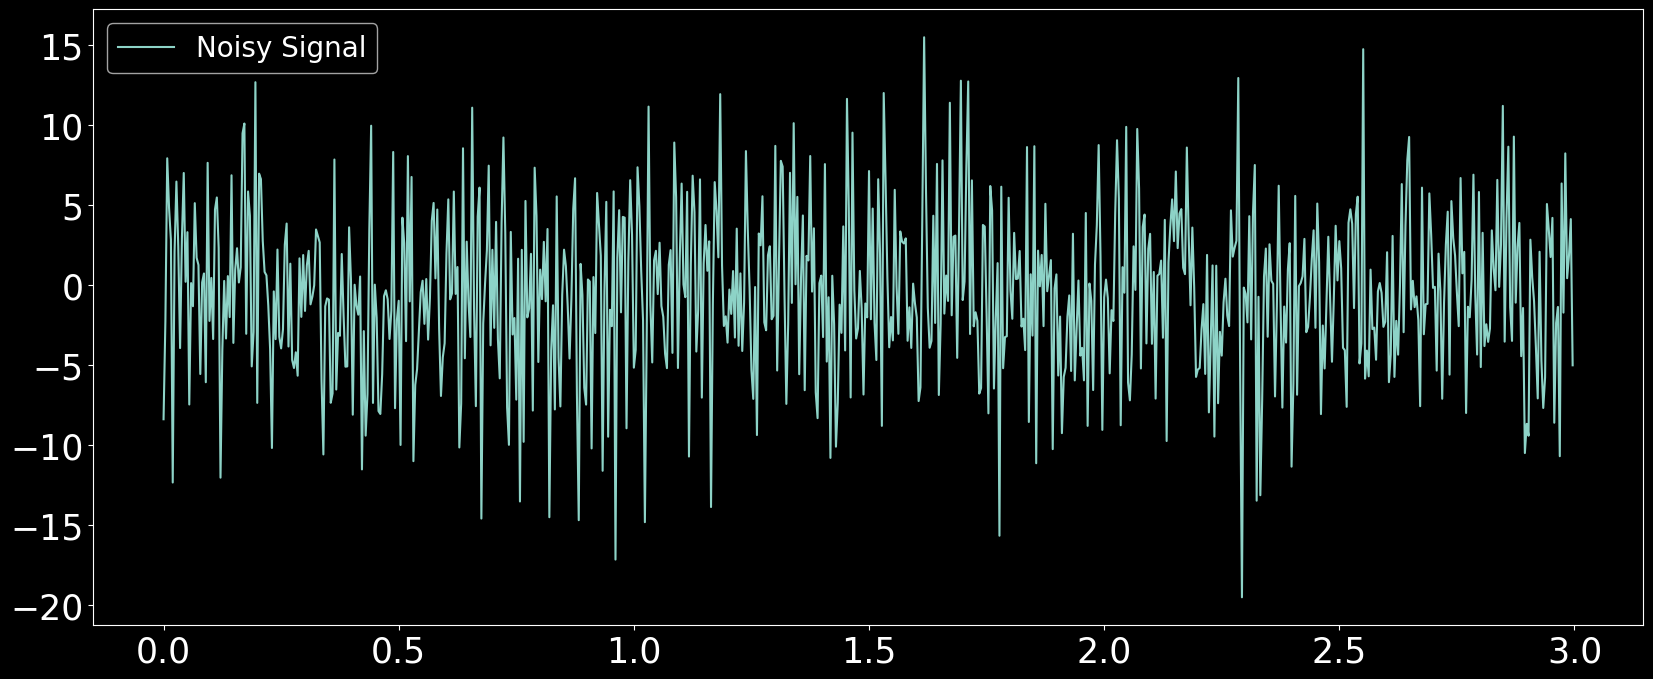

In [10]:
#Plotting noisy signal

plt.figure(figsize = (20, 8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t, Noisysignal, label = 'Noisy Signal')
plt.legend(fontsize = 20)
plt.show()

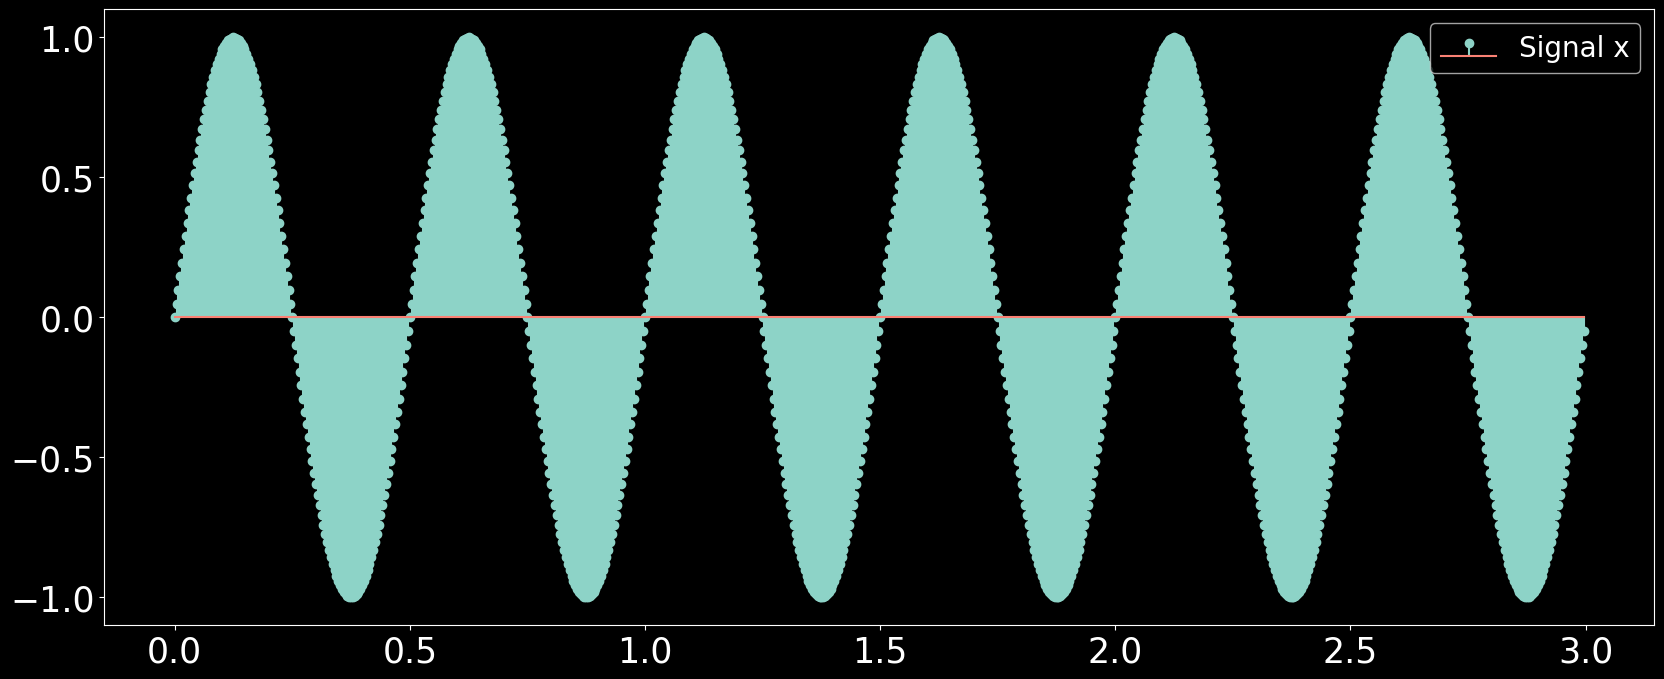

In [12]:
#Plotting original signal x using stem plot

# stem plot shows individual data points as vertical lines from the x-axis with a marker at the tip.
# It's ideal for:
# Discrete signals
# Highlighting individual sample values
# Understanding sample-by-sample variations

plt.figure(figsize = (20, 8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.stem(t, x, label = 'Signal x')
plt.legend(fontsize = 20)
plt.show()

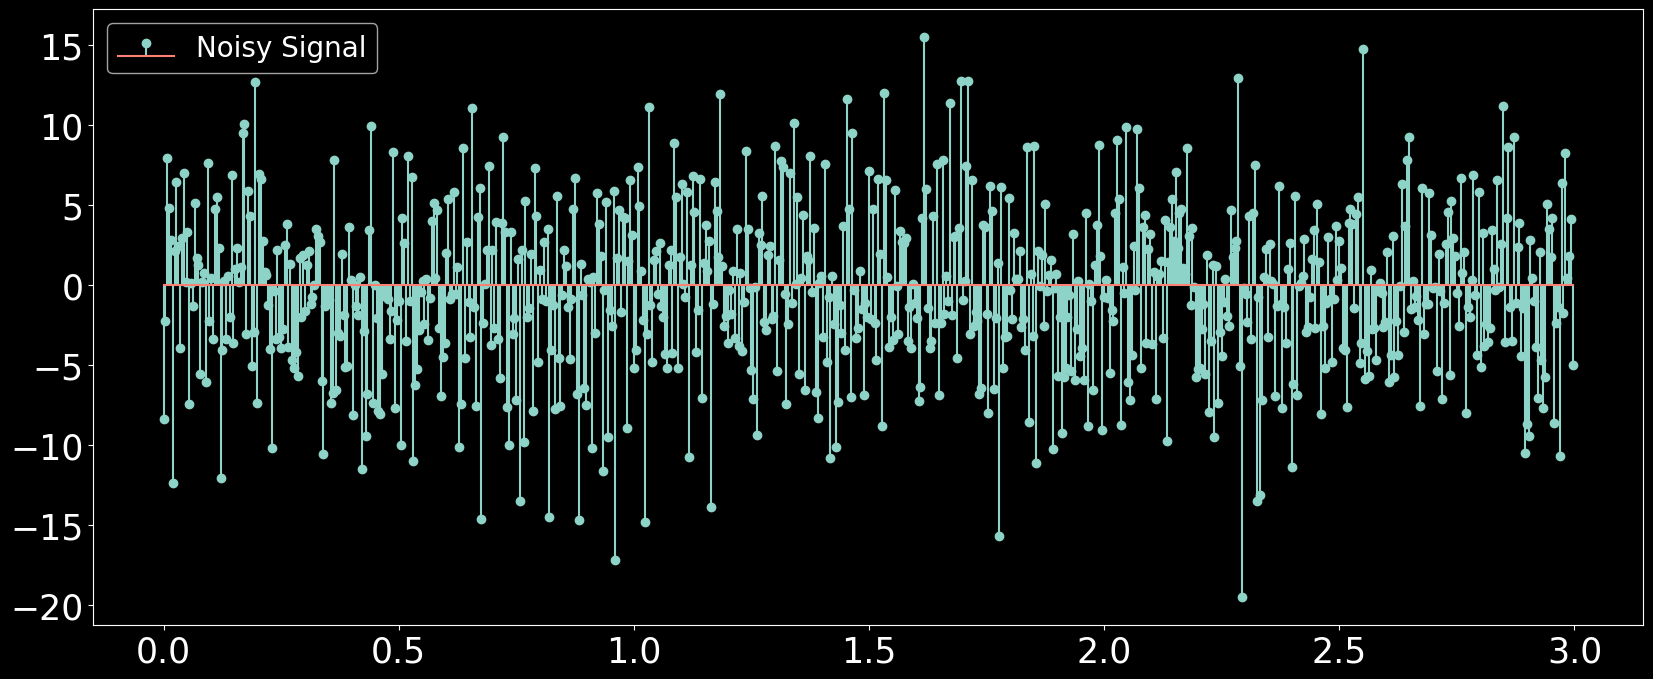

In [13]:
#Plotting noisy signal using stem function

plt.figure(figsize = (20, 8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.stem(t, Noisysignal, label = 'Noisy Signal')
plt.legend(fontsize = 20)
plt.show()

In [14]:
#selecting filter for denoising

# What this does:
# np.ones(50) creates an array of 50 ones:
# [1, 1, 1, ..., 1] (50 times)

# Multiplying by 2 makes it:
# [2, 2, 2, ..., 2] (50 times)

# Then dividing by 10 makes the final filter:
# [0.2, 0.2, 0.2, ..., 0.2] (50 times)

# 🧠 So you get a filter of length 50, where each value is 0.2.

filter = 2*np.ones(50)/10 # Moving average filter

#This is a boxcar (rectangular) or moving average–style filter, but scaled up.

filter

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [15]:
#Filtering by convolution

filteredSignal = np.convolve(Noisysignal, filter, mode = 'same')

#mode='same' means the output will be the same length as the input signal.


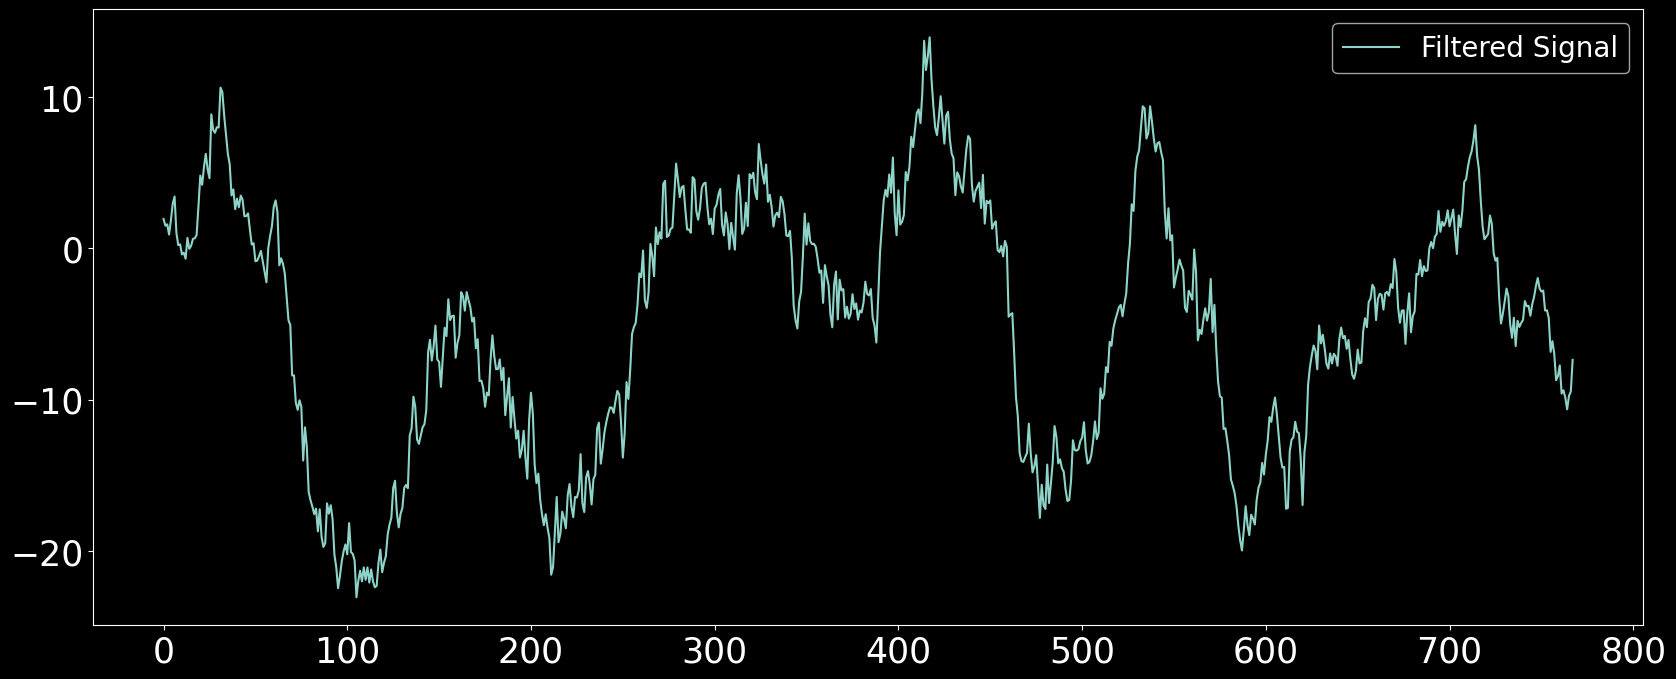

In [16]:
#plotting filtered signal

plt.figure(figsize = (20, 8))
plt.plot(filteredSignal, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

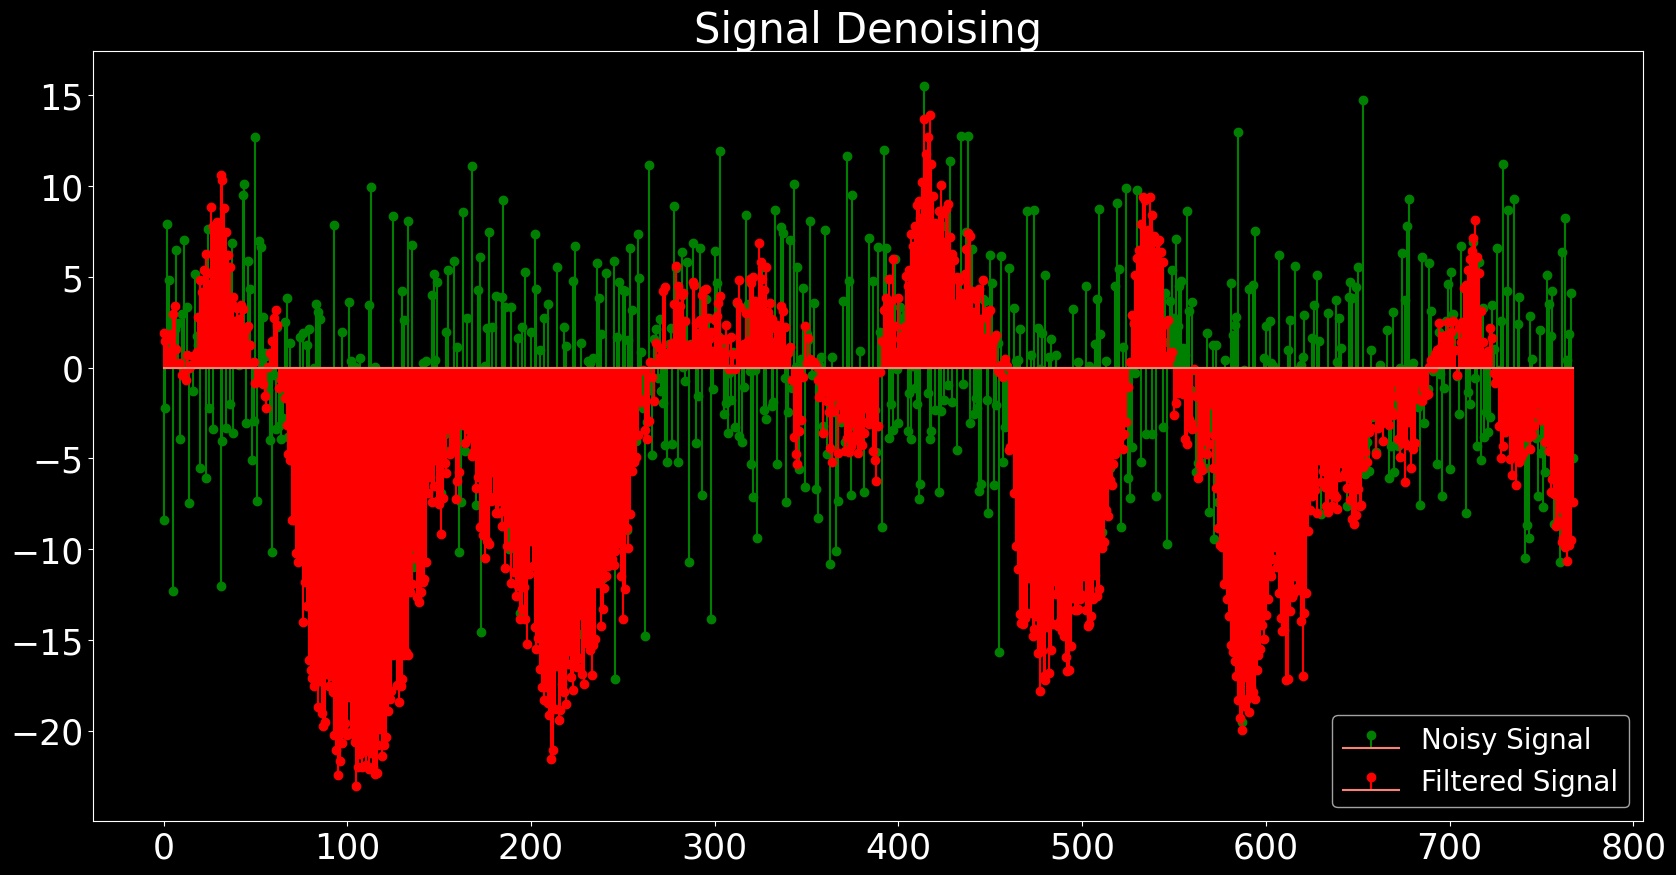

In [20]:
#plotting noisy signal and filtered signaL

plt.figure(figsize = (20, 10))
plt.stem(Noisysignal, 'g', label = 'Noisy Signal')
plt.stem(filteredSignal, 'r', label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.title('Signal Denoising', fontsize = 30)
plt.show()

In [23]:
#Filtering by convolution

double_filteredSignal = np.convolve(filteredSignal, filter, mode = 'same')


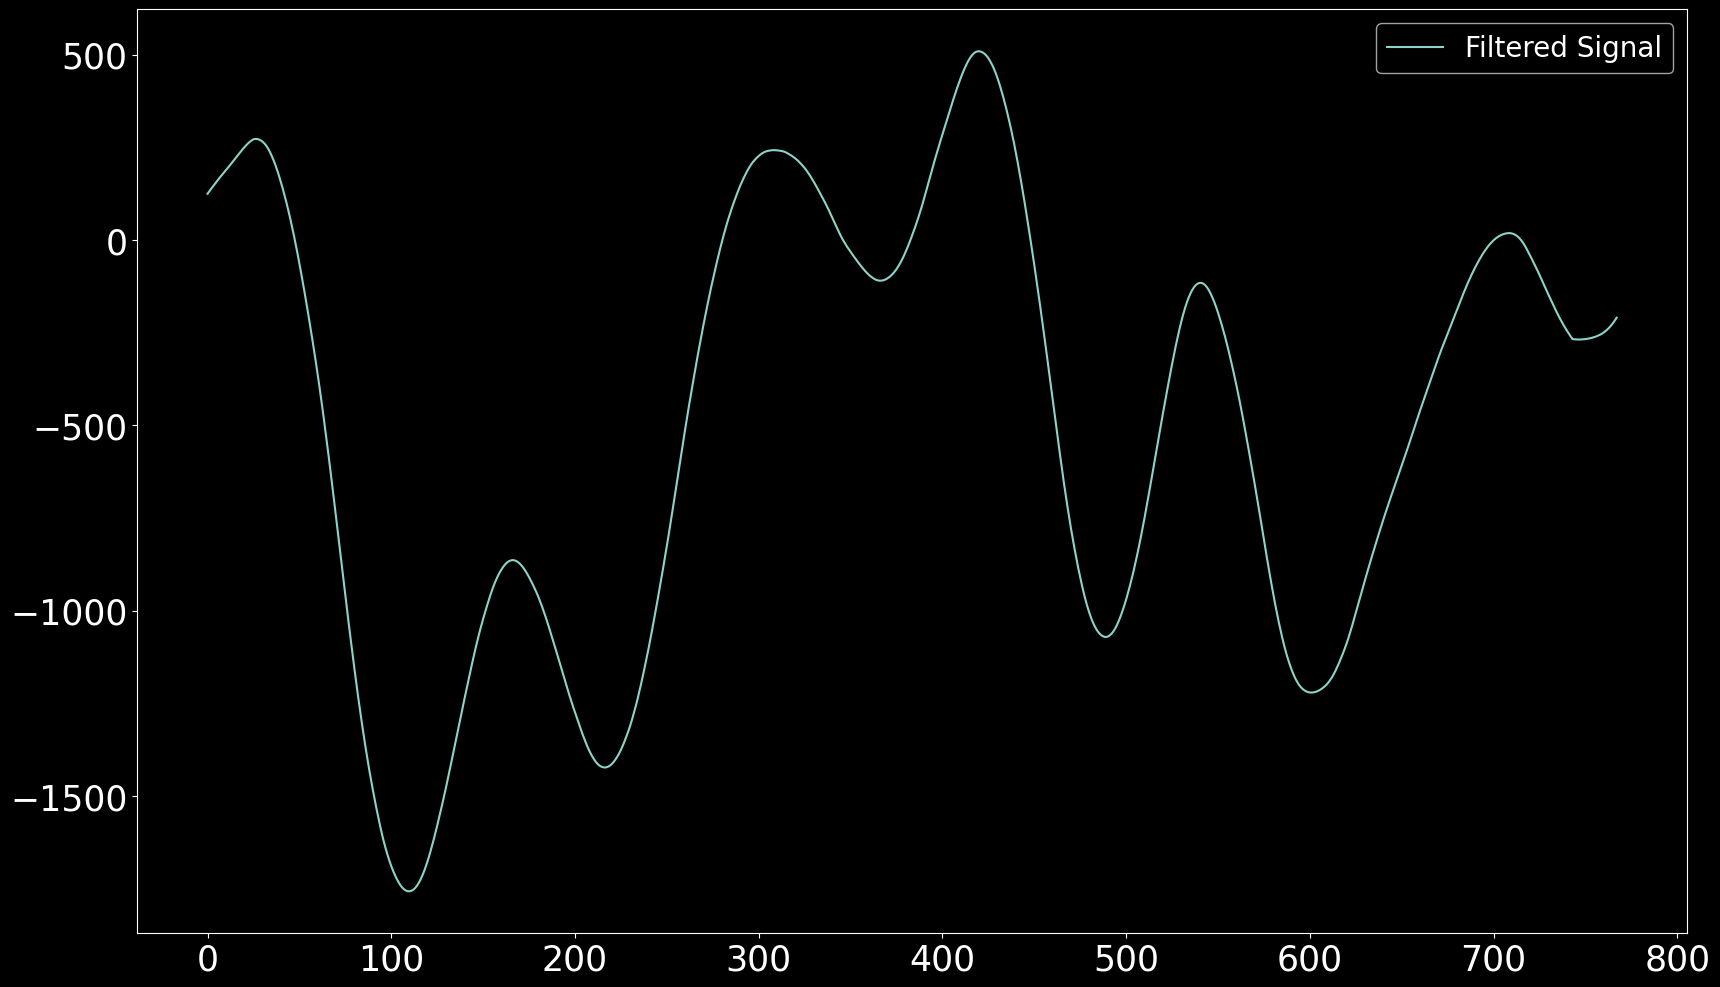

In [24]:
#plotting filtered signal

plt.figure(figsize = (20, 12))
plt.plot(double_filteredSignal, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

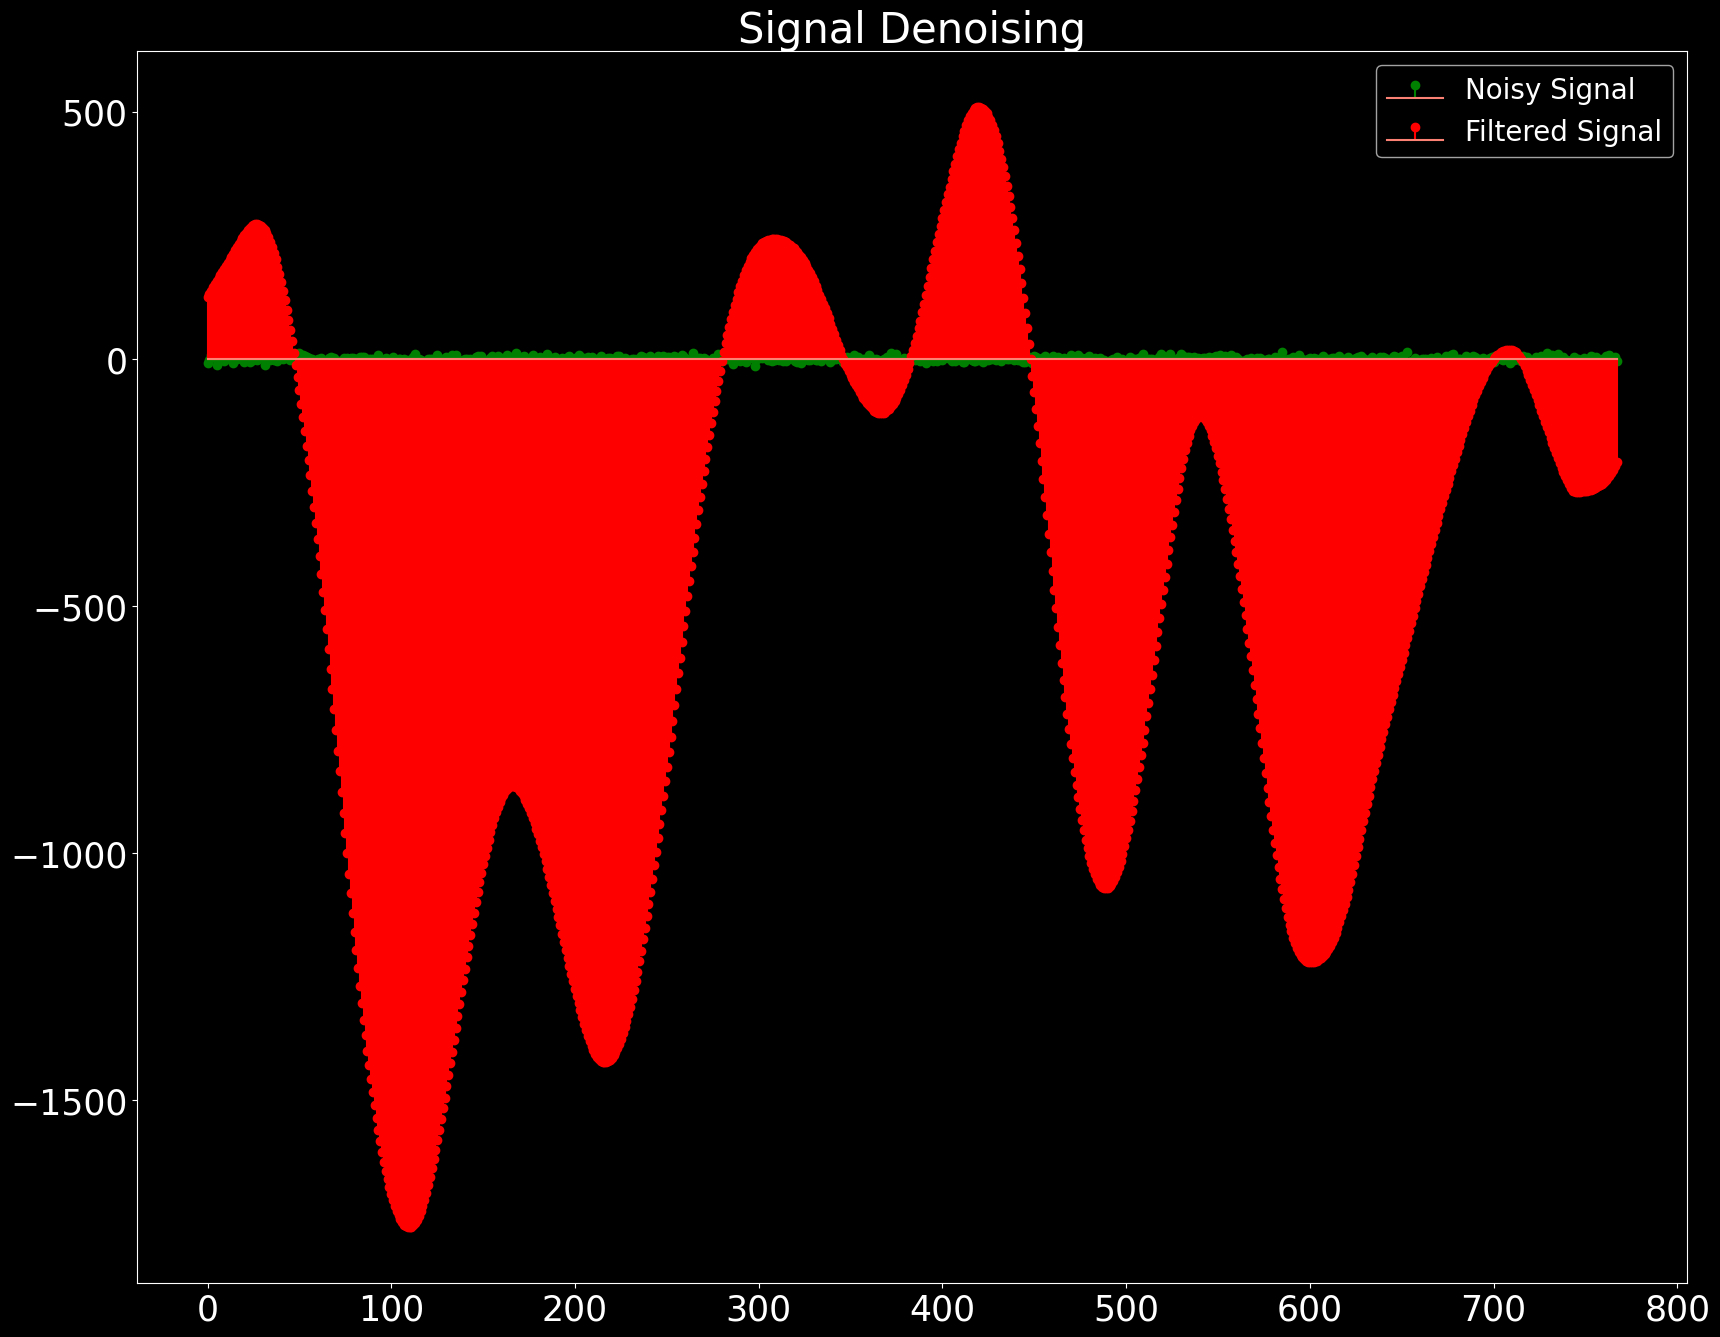

In [28]:
#plotting noisy signal and filtered signaL

plt.figure(figsize = (20, 16))
plt.stem(Noisysignal, 'g', label = 'Noisy Signal')
plt.stem(double_filteredSignal, 'r', label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.title('Signal Denoising', fontsize = 30)
plt.show()